In [26]:
!pip install biopython matplotlib seaborn


In [7]:
from Bio import AlignIO
#from Bio.SubsMat import MatrixInfo as matlist
from Bio.Align import substitution_matrices


In [8]:
from Bio import AlignIO
import numpy as np

# Load the alignment
alignment = AlignIO.read("C:\\Users\\karti\\Downloads\\clustalw.aln", "clustal")

# Define a simple match/mismatch scoring matrix for DNA sequences
nucleotide_matrix = {
    ('A', 'A'): 1, ('C', 'C'): 1, ('G', 'G'): 1, ('T', 'T'): 1,
    ('A', 'C'): -1, ('A', 'G'): -1, ('A', 'T'): -1,
    ('C', 'A'): -1, ('C', 'G'): -1, ('C', 'T'): -1,
    ('G', 'A'): -1, ('G', 'C'): -1, ('G', 'T'): -1,
    ('T', 'A'): -1, ('T', 'C'): -1, ('T', 'G'): -1
}

# Function to calculate pairwise alignment score
def calculate_pairwise_score(seq1, seq2, matrix):
    score = 0
    for nt1, nt2 in zip(seq1, seq2):
        if nt1 == '-' or nt2 == '-':  # Handle gaps
            continue
        score += matrix.get((nt1, nt2), 0)  # Use the matrix to get the score, default to 0 if not found
    return score

# Get sequence names
sequence_names = [record.id for record in alignment]

# Define the mapping of sequences to groups
group_mapping = {
    'CSAp18': 'Group 1',
    'CSAp32': 'Group 1',
    'CSAp29': 'Group 1',
    'CSAp28': 'Group 1',
    'CSAp31': 'Group 1',
    'CSAp25': 'Group 1',
    'CSAp19': 'Group 1',
    'STYP-3': 'Group 1',
    'ST2P': 'Group 2',
    'EA7': 'Group 2',
    'S11': 'Group 2',
    'S8-7': 'Group 2',
    'ST-12_60': 'Group 2',
    'SAL28': 'Group 2',
    'SAL': 'Group 2',
    'SAL11': 'Group 2',
    'S24': 'Group 2',
    'J33': 'Group 2',
    'St-1': 'Group 2',
    'S6': 'Group 2',
    'J45': 'Group 2'
}

# Define group colors
group_colors = {
    'Group 1': 'greenyellow',
    'Group 2': 'lavender',
}

# Get group labels for each sequence
group_labels = [group_mapping[seq] for seq in sequence_names]

# Calculate pairwise scores
scores = np.zeros((len(alignment), len(alignment)))  # Initialize a 2D array for scores

for i in range(len(alignment)):
    for j in range(len(alignment)):
        scores[i, j] = calculate_pairwise_score(alignment[i].seq, alignment[j].seq, nucleotide_matrix)


In [16]:
scores

array([[ 87.,  24.,   0., -20., -28., -27., -31., -25., -20.,  -7., -33.,
        -31., -19., -41., -34., -36., -30., -14.,  -3., -15.,  -9.],
       [ 24.,  80.,  -4.,  -8., -25., -31., -39., -25., -26., -11., -33.,
        -31., -19., -30., -30., -28., -32., -12., -13., -21., -13.],
       [  0.,  -4.,  40., -13., -12., -10., -16., -20.,  -9.,  -7., -12.,
        -18., -12., -23., -21., -16., -10.,  -4.,  -4., -10.,  -8.],
       [-20.,  -8., -13.,  40.,  -4., -10., -20., -16.,  -8., -11., -14.,
        -18., -14., -23., -15., -18., -24., -13., -11., -15., -17.],
       [-28., -25., -12.,  -4.,  61., -13., -19., -13., -10., -25., -19.,
        -27., -23., -30., -30., -18., -34.,  -9.,  -9., -11., -11.],
       [-27., -31., -10., -10., -13.,  76.,  28.,  20.,   7.,  -5., -27.,
        -30., -26., -25., -31., -15., -19.,  -8.,  -9., -17., -17.],
       [-31., -39., -16., -20., -19.,  28.,  76.,  16.,   7., -11., -22.,
        -24., -32., -25., -33., -23., -29.,  -8., -11., -19., -25.],

In [17]:
# Sort sequences by group
sorted_indices = sorted(range(len(sequence_names)), key=lambda i: group_labels[i])
sorted_sequence_names = [sequence_names[i] for i in sorted_indices]
sorted_scores = scores[sorted_indices, :][:, sorted_indices]
sorted_group_labels = [group_labels[i] for i in sorted_indices]


In [20]:
sorted_group_labels

['Group 1',
 'Group 1',
 'Group 1',
 'Group 1',
 'Group 1',
 'Group 1',
 'Group 1',
 'Group 1',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2',
 'Group 2']

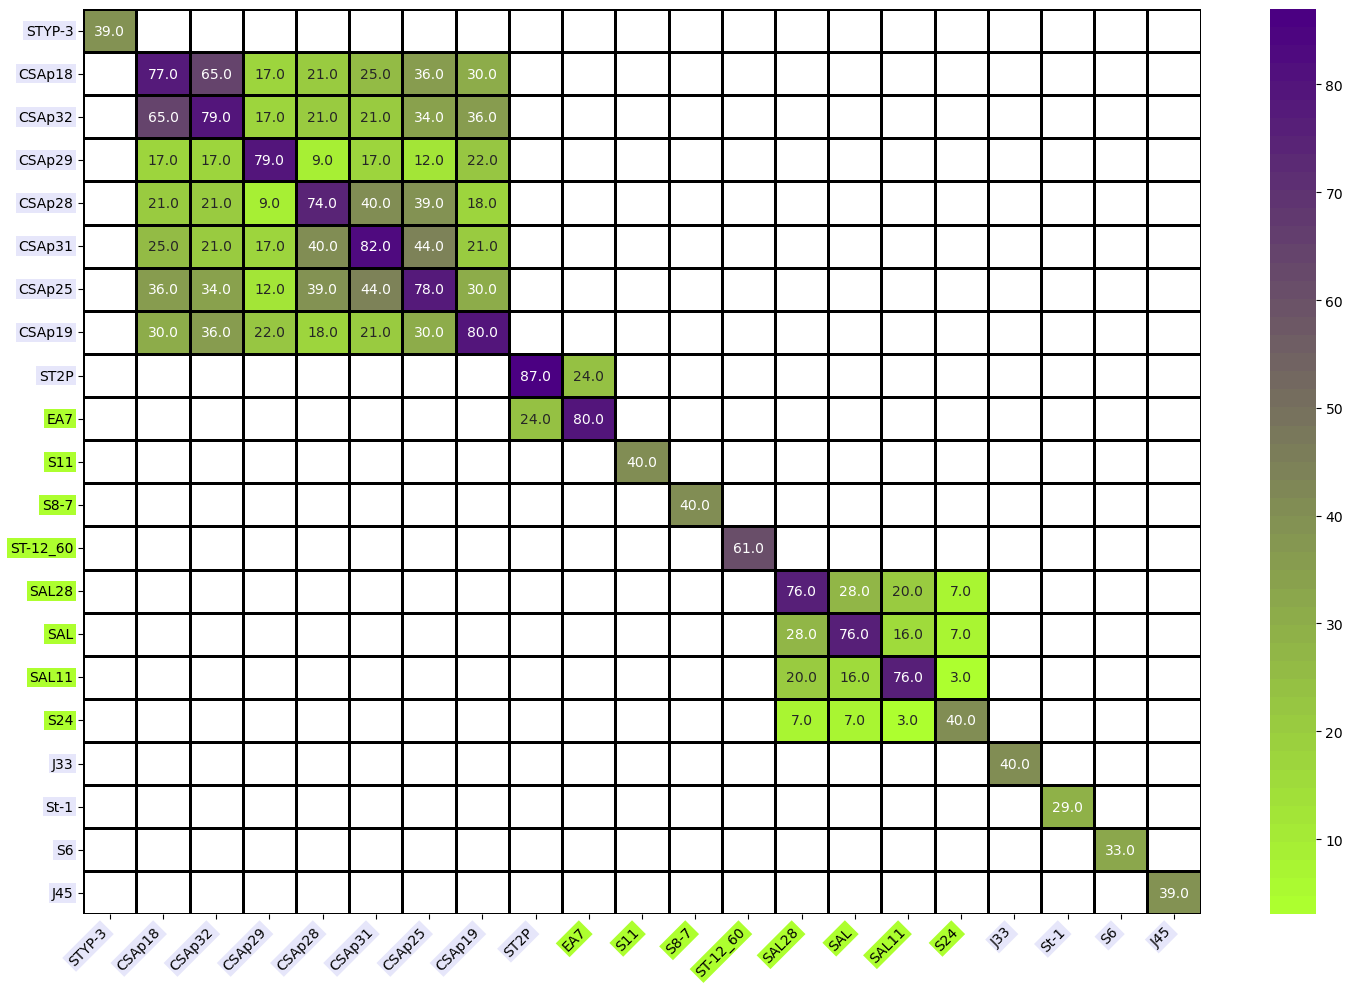

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch

# Create a DataFrame from the scores
df_scores = pd.DataFrame(sorted_scores, index=sorted_sequence_names, columns=sorted_sequence_names)
# Define the range of scores to hide (e.g., between -0.5 and 0.5)
lower_bound = -100
upper_bound = 0

# Create a mask for the scores within the specified range
mask = np.logical_and(df_scores >= lower_bound, df_scores <= upper_bound)

# Define a gradient colormap ranging from light to dark red
cmap_red = mcolors.LinearSegmentedColormap.from_list(
    'red_gradient', ['greenyellow', 'indigo'], N=50)

# Set up the figure and the axes for the heatmap
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(df_scores, annot=True, fmt=".1f", cmap=cmap_red, linewidths=1, cbar=True, mask=mask, linecolor='black')

# Create a color map for the groups and apply it to the labels
row_colors = [group_colors[label] for label in group_labels]
col_colors = [group_colors[label] for label in group_labels]

# Add outer labels formatted as a table with colors for group labels
for tick_label, tick_color in zip(plt.gca().get_yticklabels(), row_colors):
    tick_label.set_backgroundcolor(tick_color)
    tick_label.set_bbox(dict(facecolor=tick_color, edgecolor='none', pad=2))

for tick_label, tick_color in zip(plt.gca().get_xticklabels(), col_colors):
    tick_label.set_backgroundcolor(tick_color)
    tick_label.set_bbox(dict(facecolor=tick_color, edgecolor='none', pad=2))

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add a title
#plt.title(r"Correlation Heatmap of Pairwise Alignment Scores (\textit{Salmonella sp.} Aptamer)", pad=20)


# Adjust layout to fit the labels
plt.tight_layout()
plt.show()

#save to file
plt.savefig('Salmonella_aptamers_heatmap_plot.jpeg', dpi=1200, bbox_inches='tight')